In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(6555)

In [125]:
#################################################
N_train = 10

x_train = np.random.uniform(0,1,N_train).reshape(N_train,1)  #Predictors

e = 0.3 * np.random.randn(N_train,1)

t_train = np.sin(2*np.pi*x_train) + e   #Targets

#################################################
N_test = 100

x_test = np.random.uniform(0,1,N_test).reshape(N_test,1)   #Predictors

e = 0.3 * np.random.randn(N_test,1)

t_test = np.sin(2*np.pi*x_test) + e       #Targets


In [126]:
def designMatrix(x,M):
    
    if M == 0:
        return x
    
    else:
        X = np.hstack((np.ones([len(x),1]), x))
    
        for i in range(2, M+1):
            X = np.hstack((X,(x)**i))
        
        return X

In [127]:
def cost(w,x,t):
    return np.sum(np.power(x@w-t,2))

In [128]:
def closedForm(x,t):
    return np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),t)

In [129]:
####### N = 10 Train #######
error_train = np.zeros((10,1))
error_test = np.zeros((10,1))
M = 9
for i in range(M+1):
    X_train = designMatrix(x_train,i)
    X_test = designMatrix(x_test,i)
    weights_train = closedForm(X_train,t_train)
    error_train[i] = cost(weights_train,X_train,t_train)
    error_test[i] = cost(weights_train,X_test,t_test)
    
error_test = np.sqrt(error_test/N_test)
error_train = np.sqrt(error_train/N_train)


Text(0, 0.5, 'Error')

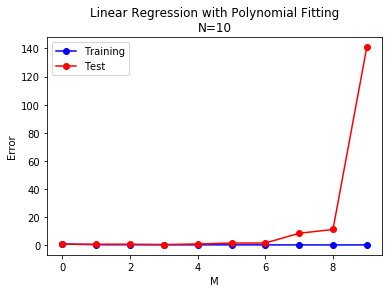

In [130]:
plt.figure(1)      ##Plot N = 10 Error
m = np.linspace(0,9,M+1)
plt.plot(m,error_train,'-o', color = 'blue', label = 'Training')
plt.plot(m,error_test,'-o', color = 'red', label = "Test")
plt.legend()
plt.title("Linear Regression with Polynomial Fitting\nN=10")
plt.xlabel('M')
plt.ylabel('Error')

In [131]:
####### N = 100 Train #######
N_train = 100

x_train = np.random.uniform(0,1,N_train).reshape(N_train,1)

e = 0.3 * np.random.randn(N_train,1)

t_train = np.sin(2*np.pi*x_train) + e

error_train = np.zeros((10,1))
error_test = np.zeros((10,1))
M = 9
for i in range(M+1):
    X_train = designMatrix(x_train,i)
    X_test = designMatrix(x_test,i)
    weights_train = closedForm(X_train,t_train)
    error_train[i] = cost(weights_train,X_train,t_train)
    error_test[i] = cost(weights_train,X_test,t_test)
    
error_test = np.sqrt(error_test/N_test)
error_train = np.sqrt(error_train/N_train)

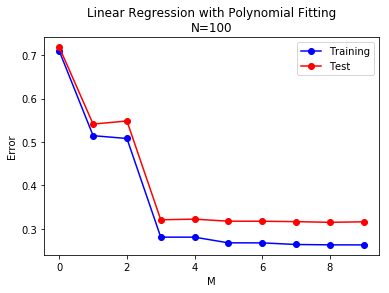

In [115]:
plt.figure(2)            ##Plot N = 100 Error
m = np.linspace(0,9,M+1)
plt.plot(m,error_train,'-o', color = 'blue', label = 'Training')
plt.plot(m,error_test,'-o', color = 'red', label = "Test")
plt.legend()
plt.title("Linear Regression with Polynomial Fitting\nN=100")
plt.xlabel('M')
plt.ylabel('Error')
plt.show()